In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch 
from scipy.stats import zscore 
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
sns.set(context="notebook",palette="Spectral",style='darkgrid',color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Data Dictionary for Market Segmentation:

1) spending: Amount spent by the customer per month (in 1000s)

2) advance_payments: Amount paid by the customer in advance by cash (in 100s)

3) probability_of_full_payment: Probability of payment done in full by the customer to the bank

4) current_balance: Balance amount left in the account to make purchases (in 1000s)

5) credit_limit: Limit of the amount in credit card (10000s)

6) min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

7) max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [98]:
df=pd.read_csv('C:\\Users\\Divya\\OneDrive\\Desktop\\Data Mining Project\\bank_marketing_part1_Data.csv')

Sample Dataset:

In [28]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [8]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [9]:
df.shape

(210, 7)

There are 210 rows and 7 columns in the dataset.

In [82]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


There are no null values in the dataset. All the variables are of float64 datatype.

Checking for Null values:

In [11]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Checking for Duplicates:

In [12]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [23]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


# EDA

# Univariate Analysis:

# Spending:

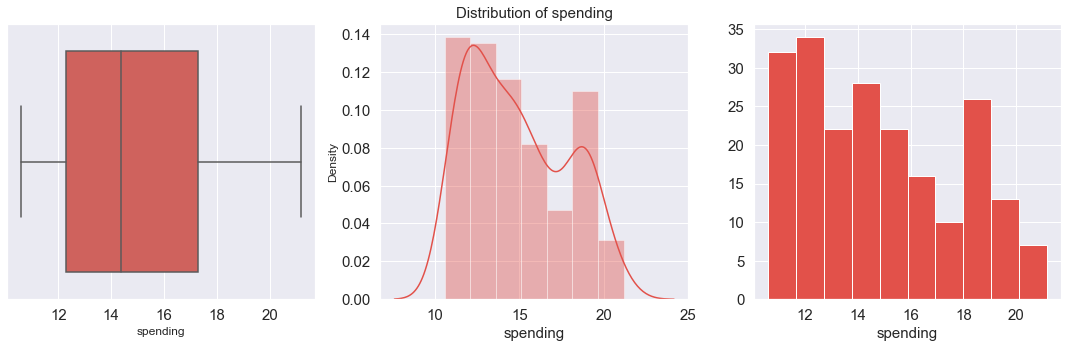

In [61]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='spending',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.set_title('Distribution of spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'spending' is positively skewed at 0.399889. There are no outliers in the variable. The distribution of spending ranges from 10.59 to 21.2.

# advance_payments:

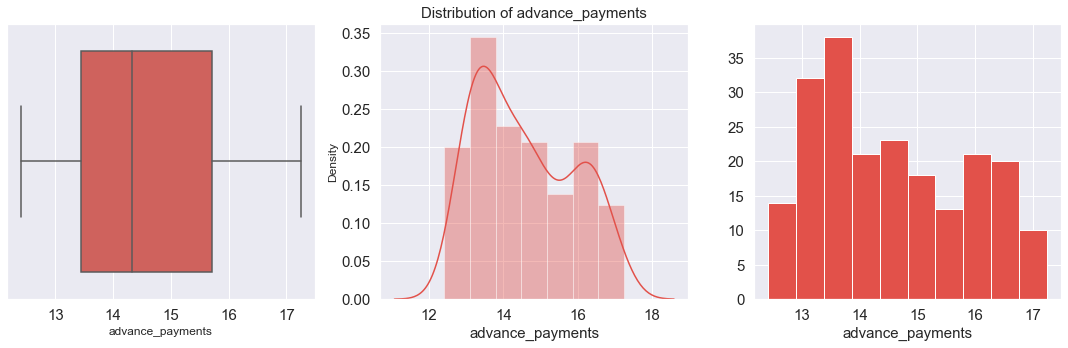

In [62]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='advance_payments',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.set_title('Distribution of advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'advance_payments' is positively skewed at 0.386573. There are no outliers in the variable. The distribution of advance_payments ranges from 12 to 18.

# probability_of_full_payment:

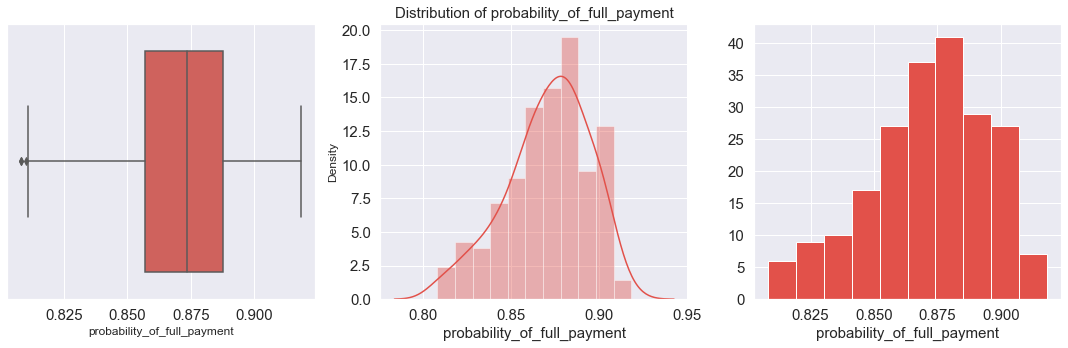

In [63]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'probability_of_full_payment' is negatively skewed at -0.537954. There are outliers in the variable. The distribution of Probability_of_full_payment ranges from 0.80 to 0.92.

# current_balance:

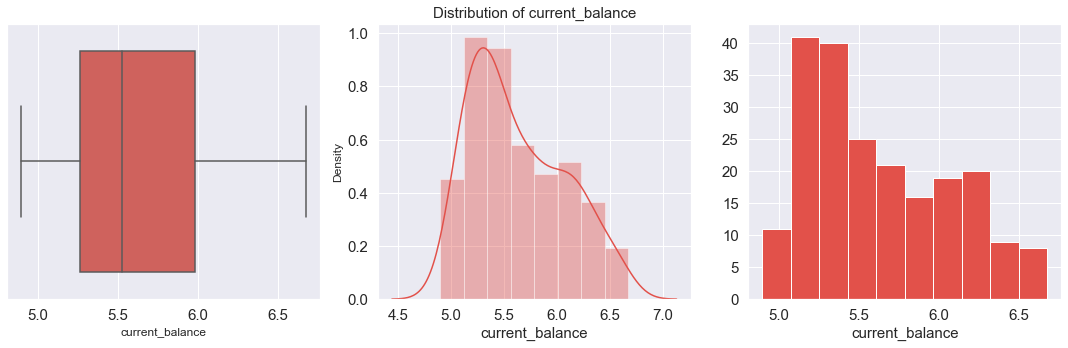

In [64]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='current_balance',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.set_title('Distribution of current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'current_balance' is positively skewed at 0.525482. There are no outliers in the variable. The distribution of current_balance ranges from 4.89 to 6.67.

# credit_limit:

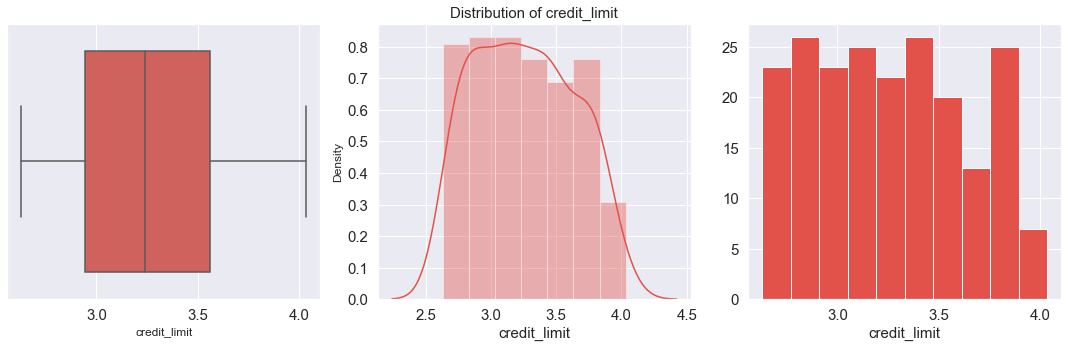

In [65]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='credit_limit',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.set_title('Distribution of credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'credit_limit' is positively skewed at 0.134378. There are no outliers in the variable. The distribution of credit_limit ranges from 2.6 to 4.03.

# min_payment_amt:

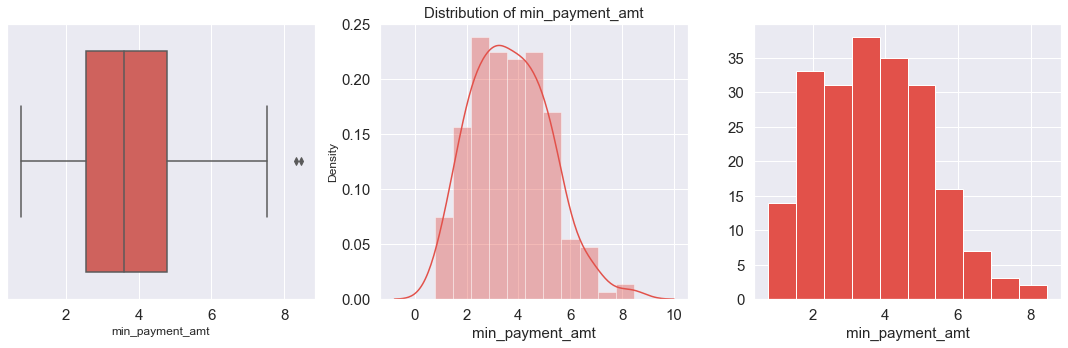

In [66]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.set_title('Distribution of min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'min_payment_amt' is positively skewed at 0.401667. There are outliers in the variable. The distribution of min_payment_amt ranges from 0.76 to 8.5.

# max_spent_in_single_shopping:

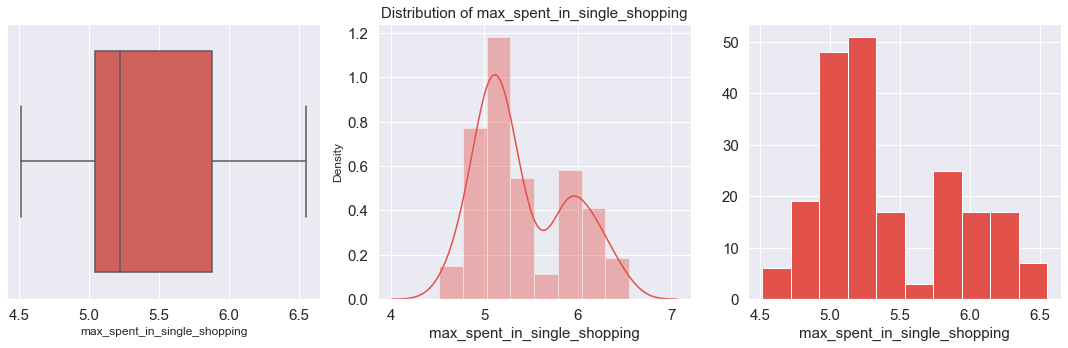

In [67]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'max_spent_in_single_shopping' is positively skewed at 0.561897. There are no outliers in the variable. The distribution of max_spent_in_single_shopping ranges from 4.5 to 6.5.

In [83]:
# Let's check the skewness values quantitatively

df.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

# Bivariate Analysis:

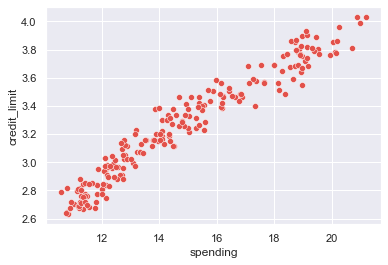

In [99]:
sns.scatterplot(x='spending', y='credit_limit', data=df)
plt.ticklabel_format(style='plain', axis='x')

The variables 'spending' and 'credit_limit' are highly correlated to each other indicating customer with more credit_limit tend to spend higher amount.

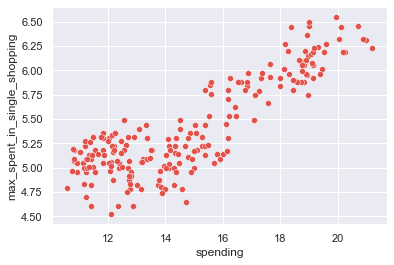

In [102]:
sns.scatterplot(x='spending', y='max_spent_in_single_shopping', data=df)
plt.ticklabel_format(style='plain', axis='x')

The variables 'spending' and 'max_spent_in_single_shopping' have good correlation between them.

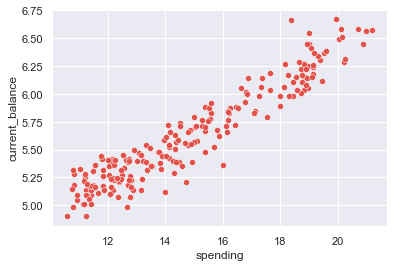

In [103]:
sns.scatterplot(x='spending', y='current_balance', data=df)
plt.ticklabel_format(style='plain', axis='x')

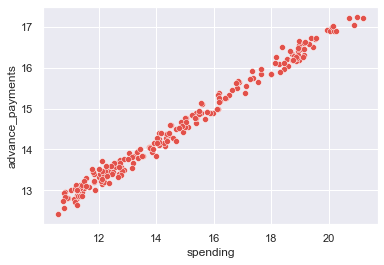

In [104]:
sns.scatterplot(x='spending', y='advance_payments', data=df)
plt.ticklabel_format(style='plain', axis='x')

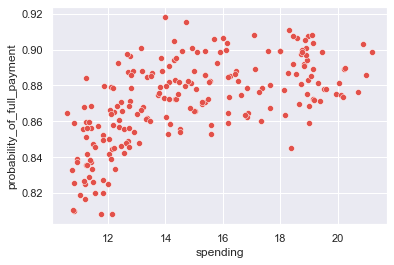

In [105]:
sns.scatterplot(x='spending', y='probability_of_full_payment', data=df)
plt.ticklabel_format(style='plain', axis='x')

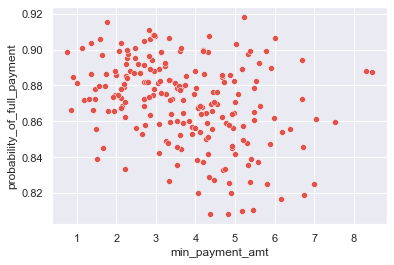

In [106]:
sns.scatterplot(x='min_payment_amt', y='probability_of_full_payment', data=df)
plt.ticklabel_format(style='plain', axis='x')

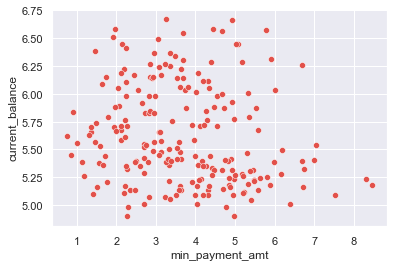

In [107]:
sns.scatterplot(x='min_payment_amt', y='current_balance', data=df)
plt.ticklabel_format(style='plain', axis='x')

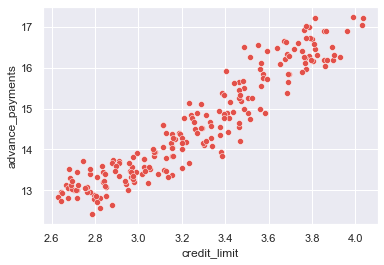

In [108]:
sns.scatterplot(x='credit_limit', y='advance_payments', data=df)
plt.ticklabel_format(style='plain', axis='x')

# Multivariate Analysis:

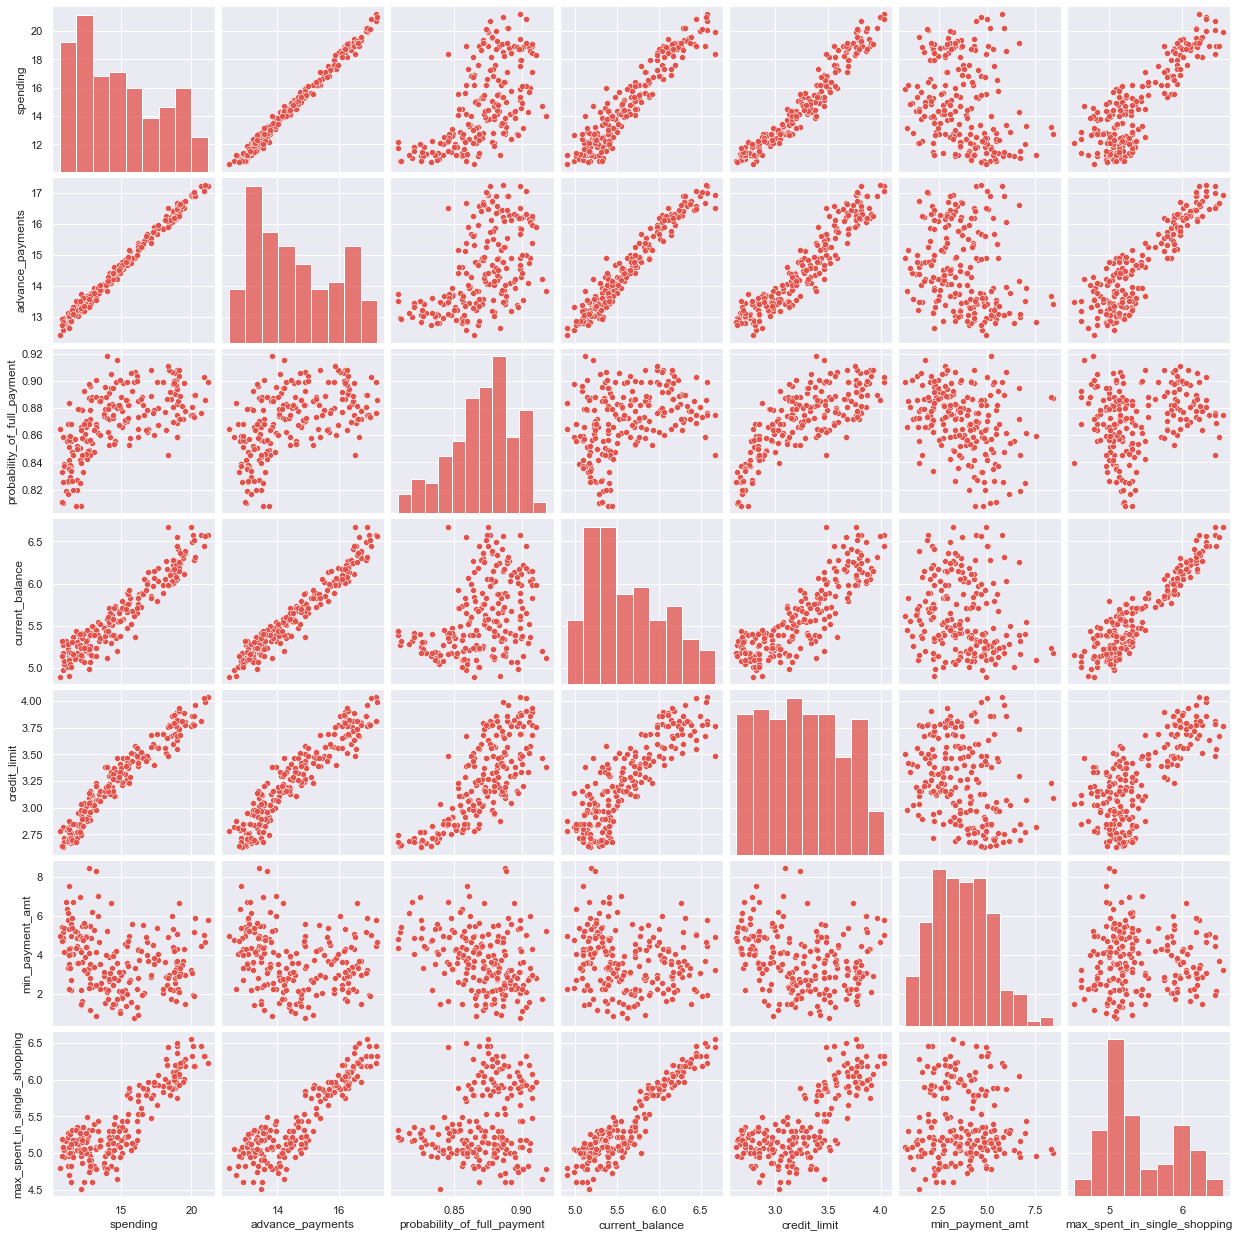

In [69]:
sns.pairplot(data=df)

In [70]:
corr = df.corr()
round(corr,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


<AxesSubplot:>

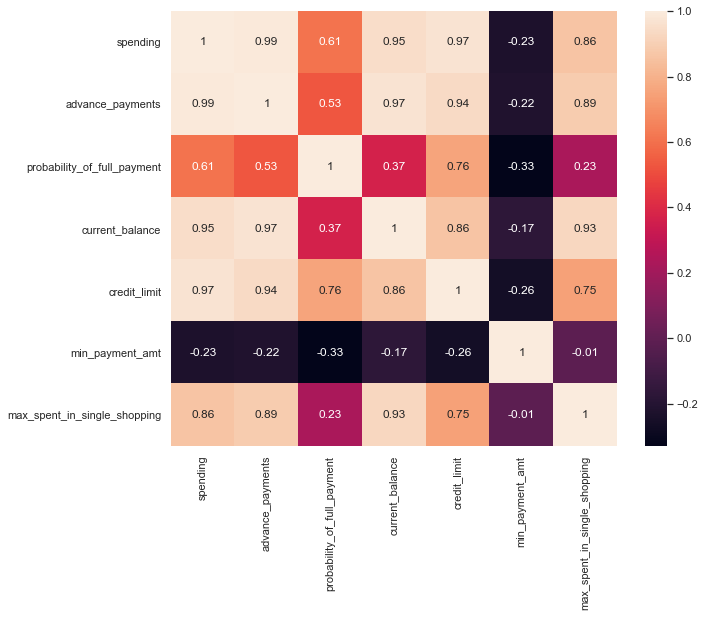

In [74]:
fig_dims = (10, 8)
fig = plt.subplots(figsize=fig_dims)
sns.heatmap(round(corr,2), annot=True)

# Checking for outliers:

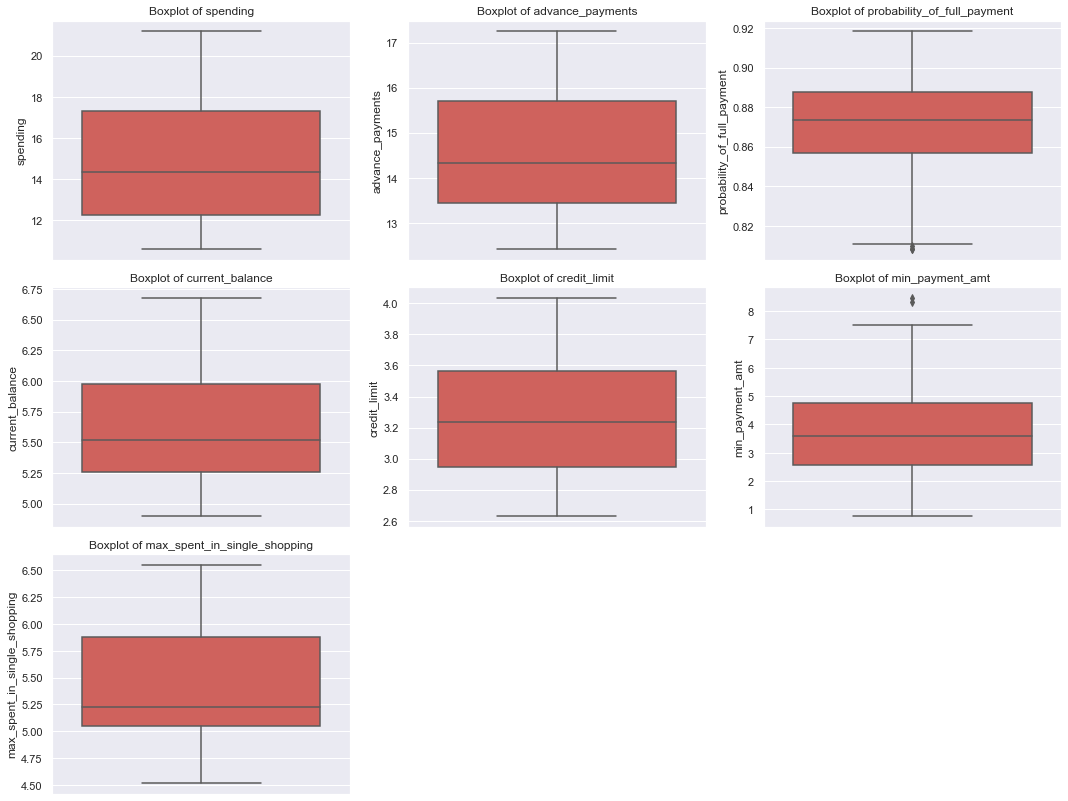

In [88]:
plt.figure(figsize = (15,15))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

# Insights:

* There are total 210 rows and 7 columns in the dataset.

* There are no missing values and duplicates in the dataset.

* All the variables in the dataset are of float64 datatype.

* The average 'credit_limit' is $3.25.

* The variable "probability_of_full_payment" is negatively skewed. All other variables are positively skewed.

* There are outliers in variables "probability_of_full_payment" and "min_payment_amt".

* From the EDA, it is understood that variables 'spending' and 'advance_payments' have strong correlation. 

* The variables 'spending' and 'credit_limit', 'spending' and 'current_balance' have strong positive correlation.

* There is strong correlation between 'advance_payments' and 'current_balance', 'advance_payments' and 'credit_limit'.

* The variables 'probability_of_full_payment' and 'current_balance', 'probability_of_full_payment' and 'max_spent_in_single_shopping' are weakly correlated to each other.



# Removing outliers:

In [89]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [90]:
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

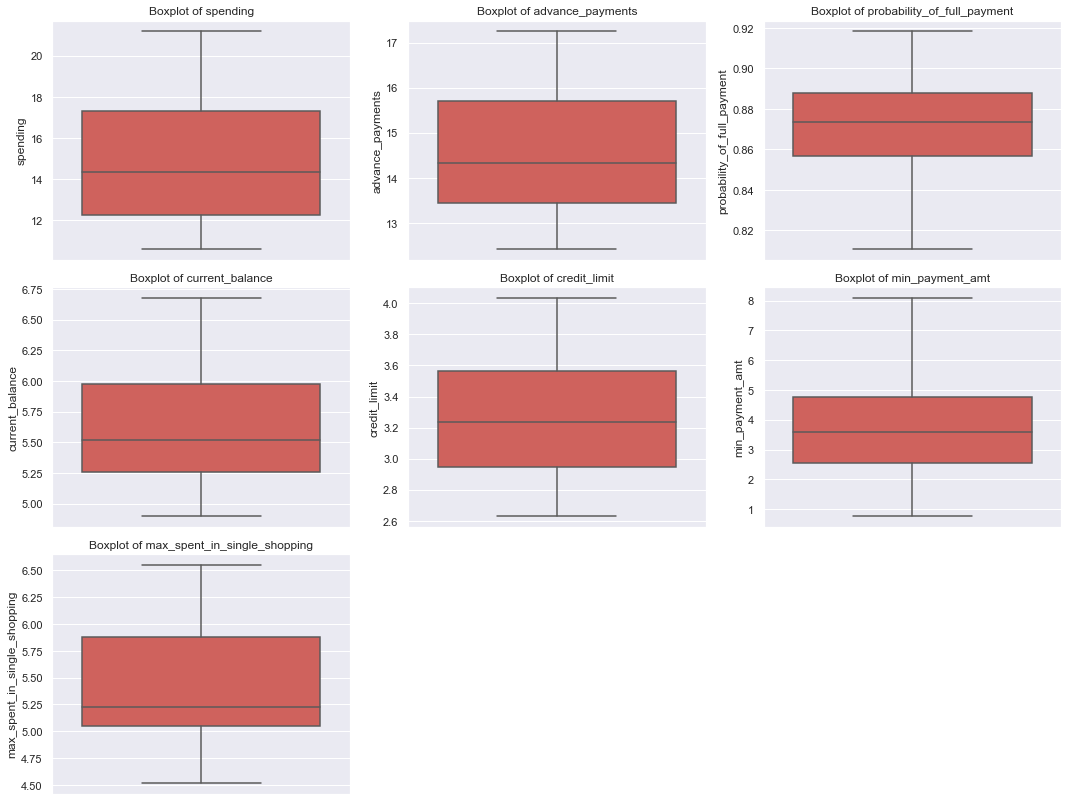

In [92]:
plt.figure(figsize = (15,15))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

# scaling:

Yes, scaling is necessary for clustering in this case. Models used for clustering works on distance based computations. The variables 'spending', 'credit_limit', 'advance_payments' have values on different scales due to which some of the variables may get more weightage. 

This will impact the performance of all distance based models as it will give higher weightage to variables which have higher magnitude. We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale.  Scaling would bring all the values relatively in same range. 

Here, I have used standard scalar method to scale the data. It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. It arranges the data in a standard normal distribution. 

In [109]:
X = StandardScaler()

In [110]:
scaled_df = pd.DataFrame(X.fit_transform(df), columns=df.columns)

In [111]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


# Hierarchical clustering on scaled data:

In [153]:
# By choosing Average linkage method 

link_method = linkage(scaled_df, method = 'average')

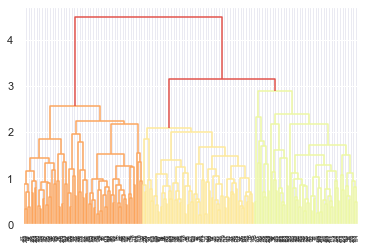

In [154]:
dend = dendrogram(link_method)

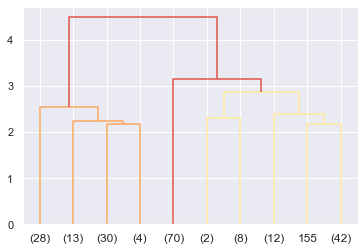

In [155]:
# Cutting the Dendrogram with suitable clusters

dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

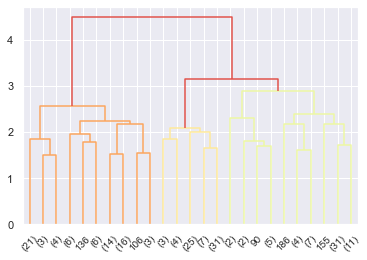

In [156]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [158]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [159]:
clusters_df= df.copy()

In [161]:
clusters_df['cluster number'] = clusters
clusters_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster number
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [162]:
# Cluster Frequency

clusters_df['cluster number'].value_counts().sort_index()

1    75
2    70
3    65
Name: cluster number, dtype: int64

In [163]:
# Cluster Profiling

aggdata=clusters_df.groupby('cluster number').mean()
aggdata['Freq']=clusters_df['cluster number'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
cluster number,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


In [164]:
# By choosing Wards linkage method 

wardlink = linkage(scaled_df, method = 'ward')

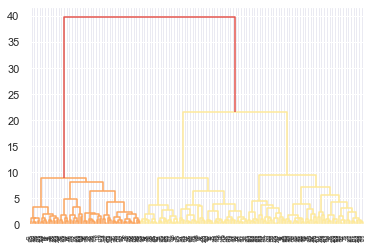

In [165]:
dend_wardlink = dendrogram(wardlink)

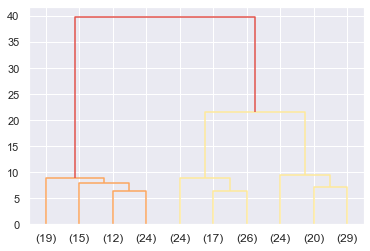

In [166]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [167]:
clusters_wardlink= fcluster(wardlink, 3, criterion='maxclust')
clusters_wardlink

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [168]:
clusters_wardlink_df = df.copy()

In [170]:
clusters_wardlink_df['clust_number']=clusters_wardlink

In [171]:
clusters_wardlink_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clust_number
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [174]:
# Cluster frequency

clusters_wardlink_df['clust_number'].value_counts().sort_index()

1    70
2    67
3    73
Name: clust_number, dtype: int64

In [173]:
# Cluster Profiling

aggdata_w= clusters_wardlink_df.groupby('clust_number').mean()
aggdata_w['Freq']=clusters_wardlink_df['clust_number'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clust_number,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


Here we have used Average Linkage and Ward's linkage method to perform heirarchichal clustering. To visualise the clusters, we have used dendrogram. Both the methods have similar means. 

Based on the hierarchichal structure of dendrogram, the optimal number of clusters for this dataset are 3. In the dendrogram, we can locate the largest vertical difference between nodes, and in the middle pass a horizontal line. The number of vertical lines intersecting it is the optimal number of clusters.

The three group cluster solution gives a pattern based on high/medium/low spending. The 210 customers have been split into 3 clusters. The low spenders have been grouped into cluster 2, medium spenders have been grouped into cluster 3 and high spenders in cluster 1.

# K-Means clustering on scaled data:

In [202]:
k_means = KMeans(n_clusters = 1,random_state=123)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [203]:
k_means = KMeans(n_clusters = 2,random_state=123)
k_means.fit(scaled_df)
k_means.inertia_

659.1474009548498

In [204]:
k_means = KMeans(n_clusters = 3,random_state=123)
k_means.fit(scaled_df)
k_means.inertia_

430.298481751223

In [205]:
k_means = KMeans(n_clusters = 4,random_state=123)
k_means.fit(scaled_df)
k_means.inertia_

370.8685962394206

In [180]:
wss =[] 

In [181]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [182]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.221763926848,
 326.8846407681858,
 289.2522049676039,
 262.4395589985371,
 238.9726645446561,
 225.10826398761685,
 207.6773505997864]

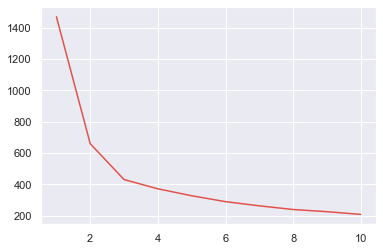

In [183]:
plt.plot(range(1,11), wss)

In [206]:
k_means = KMeans(n_clusters = 3,random_state=123)
k_means.fit(scaled_df)
labels= k_means.labels_

In [208]:
labels

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [216]:
pd.Series(labels).value_counts()

1    72
2    71
0    67
dtype: int64

In [209]:
k_means_dataset=df.copy()

In [210]:
k_means_dataset["Clus_kmeans"] = labels
k_means_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.573278,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.365564,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.637092,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.515595,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.360972,0


In [215]:
silhouette_score(scaled_df,labels)

0.4008059221522216

In [212]:
from sklearn import metrics

In [213]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(scaled_df)
    scores.append(metrics.silhouette_score(scaled_df, km.labels_))
    
scores

[0.46560100442748986,
 0.4008059221522216,
 0.32943733699973826,
 0.28331581604237704,
 0.29008748137211443,
 0.27924385297493454,
 0.2638089896766218,
 0.2583926120522323,
 0.26637561394383974]

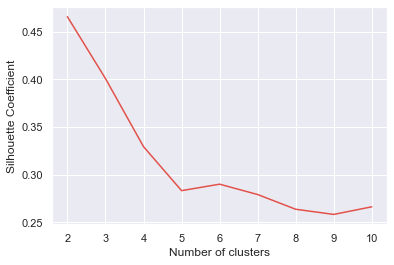

In [214]:
#plotting the sc scores

plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

From SC Score, the number of optimal clusters could be 3 or 4

In [194]:
sil_width = silhouette_samples(scaled_df,labels)

In [199]:
k_means_dataset["sil_width"] = sil_width
k_means_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2,0.360972


In [200]:
silhouette_samples(scaled_df,labels).min()

0.002768541128616533

In [218]:
aggdata_k= k_means_dataset.groupby("Clus_kmeans").mean()
aggdata_k['Freq']=k_means_dataset['Clus_kmeans'].value_counts().sort_index()
aggdata_k

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width,Freq
Clus_kmeans,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468077,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,0.399556,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.338593,71


* Here, we performed k-means clustering on scaled data. Based on WSS (Elbow Plot) and silhouette scores, the optimal number of clusters are 3 or 4. 

* After cluster 3, there is no huge drop in inertia values. Also the Elbow curve seems to show similar results.

* The silhouette width score of the k-means also seems to be very less. It indicates all the data points are properly assigned to cluster. There is no mismatch of datapoints with regards to clustering.

* Cluster 0-High spenders, Cluster 1-Low spenders, Cluster 2-Medium spenders

# cluster profiles:

3 group cluster through k-means clustering:

In [221]:
aggdata_k.T

Clus_kmeans,0,1,2
spending,18.495373,11.856944,14.437887
advance_payments,16.203433,13.247778,14.337746
probability_of_full_payment,0.884210,0.848330,0.881597
current_balance,6.175687,5.231750,5.514577
credit_limit,3.697537,2.849542,3.259225
min_payment_amt,3.632373,4.733892,2.707341
max_spent_in_single_shopping,6.041701,5.101722,5.120803
sil_width,0.468077,0.399556,0.338593
Freq,67.000000,72.000000,71.000000


3 group cluster through hierarchical clustering:

In [222]:
aggdata.T

cluster number,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846845,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.759007
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Freq,75.000000,70.000000,65.000000


# Cluster Group Profiles


Group 1 : High Spending

* Out of 210 customers, 75 customers fall under 'High spending' category. The average spending of these customers is around 18.2. 

* When compared to other 2 cluster groups, the average 'advance_payments' made is high in this group. 

* The 'max_spent_in_single_shopping' is also high in this group compared to other 2 cluster groups.
    
Group 3 : Medium Spending

* Out of 210 customers, 65 customers fall under 'Medium spending' category. The average spending of these customers is around 14.2. 

* The average 'spending' and the average 'advance_payments' made by this group is almost same which means these customers pay bills on time and maintain good credit score.

* The 'probability_of_full_payment' is high for this cluster group compared to others.
    
Group 2 : Low Spending

* Out of 210 customers, 70 customers fall under 'Low spending' category. The average spending of these customers is around 11.9.

* The average 'min_payment_amt' made by these customers is comparitively high than other 2 cluster groups.

* The 'credit_limit','probability_of_full_payment','advance_payments' is low for this group compared to high and medium spending groups. 

